In [74]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_result(df):
    # 1. 평면도 이미지 불러오기
    floor_plan_path = 'floor_plan/KakaoTalk_20241124_152724186_02.png'  # 평면도 이미지 파일 경로
    floor_plan = cv2.imread(floor_plan_path)
    floor_plan = cv2.cvtColor(floor_plan, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷이므로 RGB로 변환

    # 랜드마크 고유값 추출
    unique_landmarks = df["landmark"].unique()

    # 고유 랜드마크 값을 인덱스 매핑
    landmark_indices = {landmark: i for i, landmark in enumerate(unique_landmarks)}

    # 인덱스를 0~255로 정규화
    normalized_indices = np.array(list(landmark_indices.values())) * (255 // (len(unique_landmarks) - 1))

    # OpenCV colormap으로 랜드마크 색상 생성
    colormap = cv2.applyColorMap(normalized_indices.astype(np.uint8).reshape(-1, 1), cv2.COLORMAP_JET)
    random_colors = {
        landmark: colormap[i][0] / 255.0  # OpenCV는 BGR 형식이므로 RGB로 변환 후 0~1로 정규화
        for landmark, i in landmark_indices.items()
    }
    random_colors['None'] = '#FFF'

    # WiFi Calibrated 여부에 따라 테두리 색상 설정
    df["edge_color"] = df["WiFiCalibrated"].map({True: "blue", False: "red"})

    # 시각화
    plt.figure(figsize=(12, 8))
    plt.imshow(floor_plan, extent=(0, 1, 0, 1), origin='lower')  # 평면도 표시

    # 데이터 포인트 연결
    if not df.empty:  # 전체 데이터가 비어있지 않은 경우에만 연결선 그리기
        plt.plot(df["x"], df["y"], color="black", alpha=0.7, linestyle="--")


    # 랜드마크별로 점 그리기
    for landmark in unique_landmarks:
        subset = df[df["landmark"] == landmark]
        if subset.empty:  # 서브셋이 비어있으면 건너뜁니다.
            continue
        plt.scatter(
            subset["x"],
            subset["y"],
            color=random_colors[landmark],  # 랜드마크에 따른 색상
            # edgecolors=subset["edge_color"],  # WiFi Calibrated 여부에 따른 테두리 색상
            edgecolors='black',
            s=120,
            label=f"{landmark}",
            zorder=2
        )


    # 축 비율 조정 및 제목
    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1 / 2.42)
    plt.title("Trajectory with Landmark Detection")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")

    # 범례 배치 (여백에 위치)
    plt.legend(
        loc="center left",           # 왼쪽 가운데 정렬
        bbox_to_anchor=(1.05, 0.5),  # 그래프 오른쪽 밖의 여백 중앙에 배치
        borderaxespad=0,             # 축과 범례 사이의 거리
        fontsize=10                  # 범례 글자 크기
    )

    plt.grid(True)

    # 시각화 출력
    plt.show()


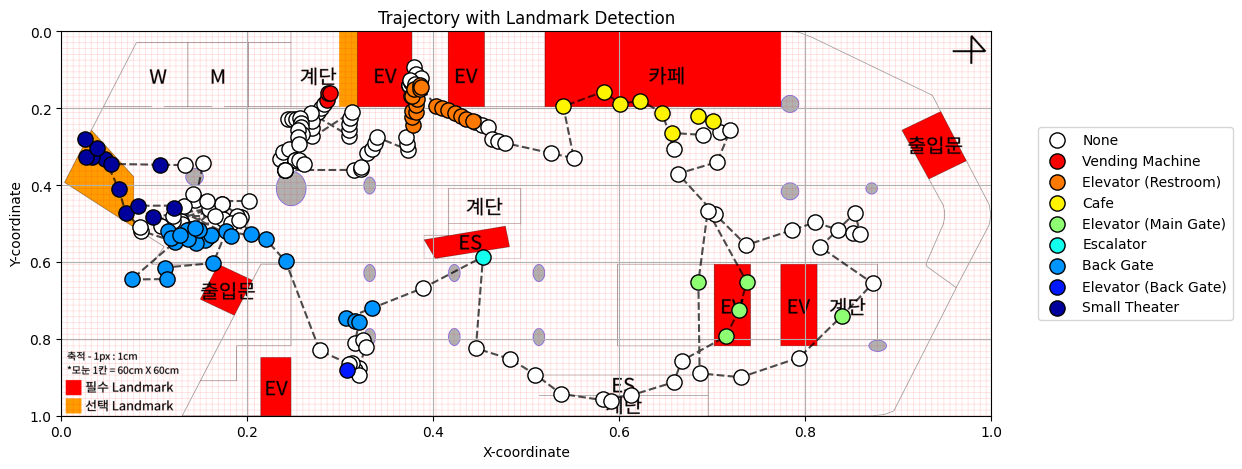

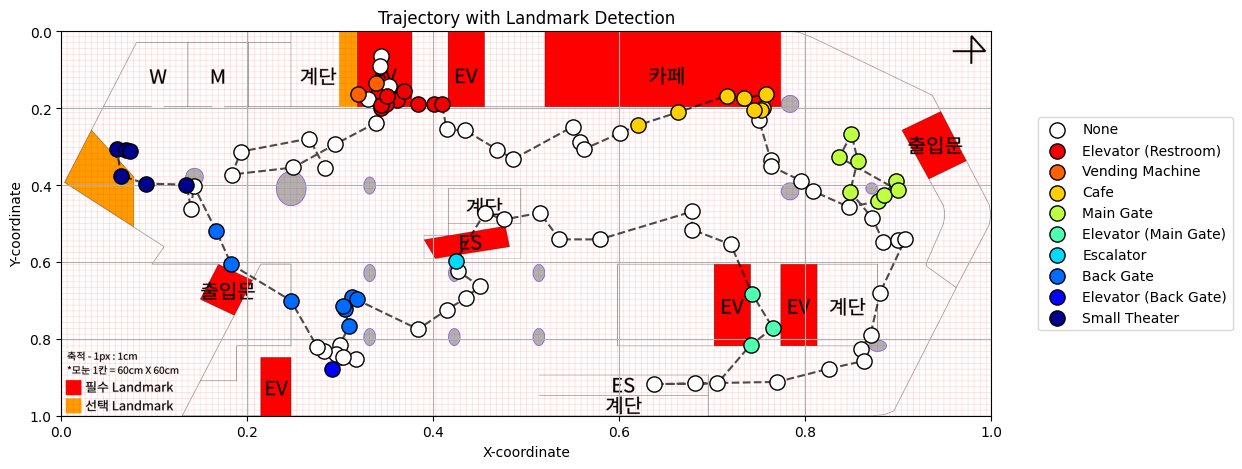

In [80]:
df = pd.read_csv("./data/result/demo1.csv").fillna("None")
plot_result(df)
df = pd.read_csv("./data/result/demo2.csv").fillna("None").iloc[8:]
plot_result(df)

In [78]:
def plot_result_wifi_cali(df):
    floor_plan_path = 'floor_plan/KakaoTalk_20241124_152724186_02.png'  # 평면도 이미지 파일 경로
    floor_plan = cv2.imread(floor_plan_path)
    floor_plan = cv2.cvtColor(floor_plan, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷이므로 RGB로 변환
        
    # WiFiCalibrated 여부에 따라 색상 구분
    colors = df["WiFiCalibrated"].map({True: "blue", False: "red"})

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(df["x"], df["y"], c=colors, label="WiFi Calibrated")

    # 데이터 포인트를 선으로 연결
    plt.plot(df["x"], df["y"], color="gray", alpha=0.5, linestyle="--")
    plt.imshow(floor_plan, extent=(0, 1, 0, 1), origin='lower') # extent=(x_min, x_max, y_min, y_max)

    # 랜드마크 표시
    for i, row in df.fillna("").iterrows():
        if row["landmark"]:
            # plt.scatter(row["x"], row["y"], color="green", s=100, edgecolors="black", label=row["landmark"])
            plt.text(row["x"] + 0.01, row["y"] + 0.01, row["landmark"], fontsize=9, color="green")

    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1/2.42)

    plt.title("Data Visualization with WiFi Calibration and Landmarks")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend(["Not Calibrated", "Calibrated", "Landmark", "Path"], loc="upper right")
    plt.grid(True)
    plt.show()


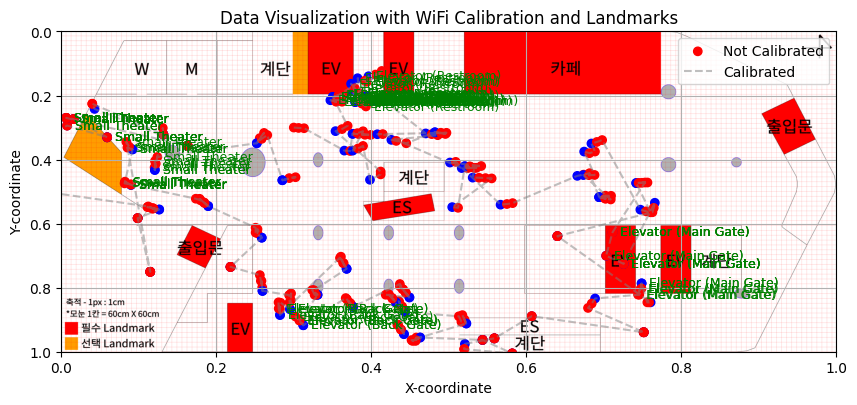

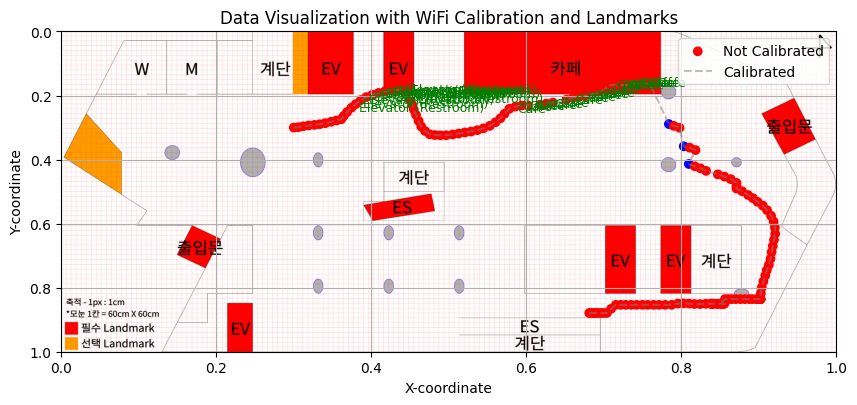

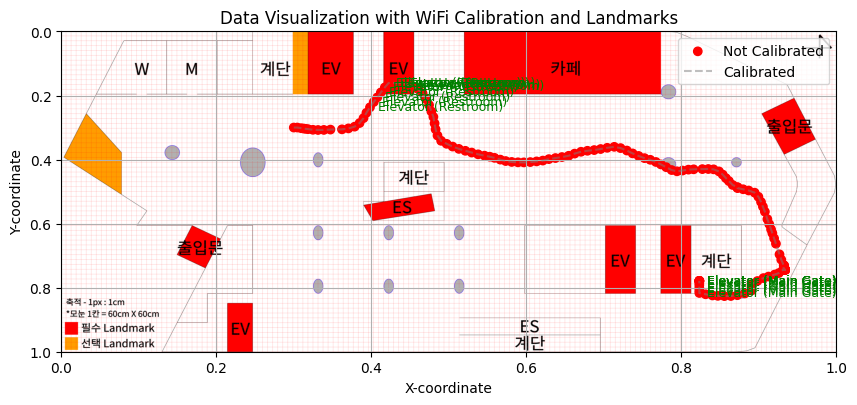

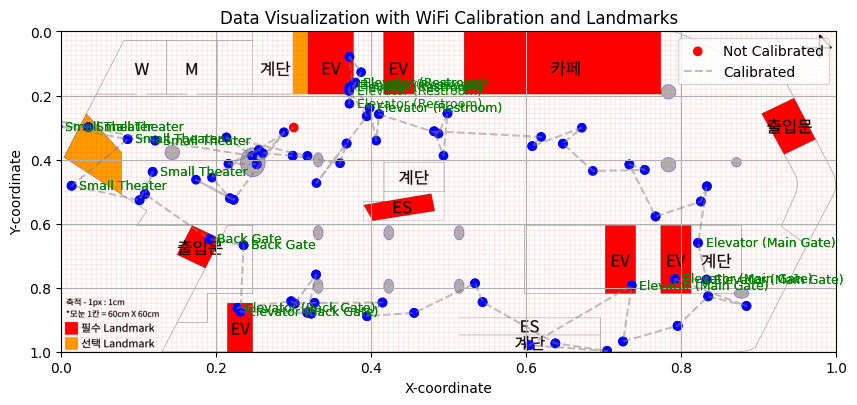

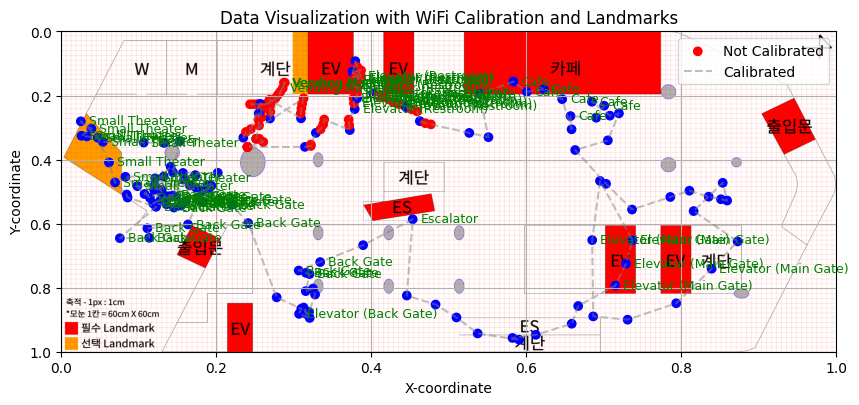

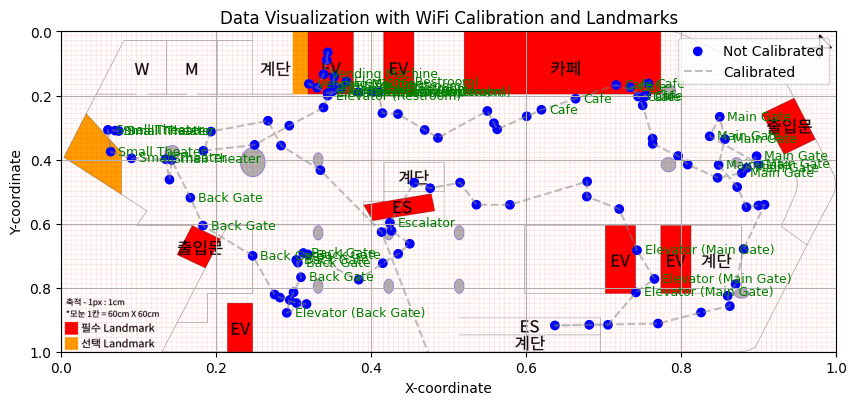

In [79]:
plot_result_wifi_cali(pd.read_csv("./data/result/1211_(1)_100-0.csv"))
plot_result_wifi_cali(pd.read_csv("./data/result/1211_(2)_50-50_mask.csv"))
plot_result_wifi_cali(pd.read_csv("./data/result/1211_DR.csv"))
plot_result_wifi_cali(pd.read_csv("./data/result/1211_WiFi.csv"))
plot_result_wifi_cali(pd.read_csv("./data/result/demo1.csv"))
plot_result_wifi_cali(pd.read_csv("./data/result/demo2.csv"))